In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import artm

# change log style
lc = artm.messages.ConfigureLoggingArgs()
lc.minloglevel = 3
lib = artm.wrapper.LibArtm(logging_config=lc)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from copy import deepcopy
from topicnet.cooking_machine.models.topic_model import TopicModel
from topicnet.cooking_machine.cubes import RegularizersModifierCube
from topicnet.cooking_machine.models.blei_lafferty_score import BleiLaffertyScore
from topicnet.cooking_machine.config_parser import build_experiment_environment_from_yaml_config

from topicnet.cooking_machine.experiment import Experiment
from topicnet.cooking_machine.cubes import *
from topicnet.cooking_machine.dataset import Dataset

%load_ext autoreload
%autoreload 2

In [3]:
import topicnet.cooking_machine.cubes as tncubes

In [4]:
from IPython.core.display import display, HTML
from IPython.display import clear_output, display_html
display(HTML("""<style>
.container { width:90% !important; }
div.output_scroll .output_subarea { white-space: pre; }
</style>"""))

### Get dataset

In [5]:
DATASET_PATH = "/home/sultan/datasets/PScience/PScience.csv"

In [6]:
dataset = Dataset(DATASET_PATH)
dictionary = dataset.get_dictionary()

In [7]:
print(dataset.get_possible_modalities())
dataset.get_dataset().head()

{'@word', '@snippet', '@title', '@2gramm', '@post_tag', '@3gramm', '@author'}


,vw_text,raw_text
id,,
1.txt,1.txt |@author fuchs preobrazhensky tabachniko...,@title Автограф # «Математический дивертисмент...
2.txt,2.txt |@word книга:2 лекция:3 рассматриваться:...,@title Главы: Маскулинности в российском конте...
3.txt,3.txt |@word развитие появляться пиджина:4 бел...,@title Пиджины и креольские языки | @snippet Л...
4.txt,4.txt |@word стандартный задача:3 состоять:4 р...,@title FAQ: Физиология микроводорослей | @snip...
5.txt,5.txt |@2gramm повседневный_практика государст...,@title Русская государственная идеология | @sn...


### Make initial model

In [8]:
with open("/home/sultan/recipes/ARTM_baseline-decorrelate-3gramm.yml", "r") as f:
    yaml_string = f.read()

specific_topics = [f'topic_{i}' for i in range(30)]
background_topics = [f'bcg_{i}' for i in range(len(specific_topics),len(specific_topics) + 1)]

yaml_string = yaml_string.format(
    modality1='@word',
    modality2='@2gramm',
    modality3='@3gramm',
    modality4='@post_tag',
    modality_list=['@2gramm', '@word', '@post_tag', '@3gramm'],
    main_modality='@word',
    dataset_path=DATASET_PATH,
    specific_topics=specific_topics,
    background_topics=background_topics)

print(yaml_string)

# This config follows a strategy described by Murat Apishev
# one of the core programmers of BigARTM library in personal correspondence.
# According to his letter 'decent' topic model can be obtained by
# Decorrelating model topics simultaneously looking at retrieved TopTokens


# Use .format(modality_list=modality_list, main_modality=main_modality, dataset_path=dataset_path,
# specific_topics=specific_topics, background_topics=background_topics)
# when loading the recipe to adjust for your dataset

topics:
# Describes number of model topics, better left to the user to define optimal topic number
    specific_topics: ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29'] 
    background_topics: 

### Run experiment

In [9]:
from topicnet.cooking_machine.experiment import Experiment
if os.path.exists(f'./MuratDemo') == True:
    os.system("rm -rf ./MuratDemo")
experiment, dataset = build_experiment_environment_from_yaml_config(
    yaml_string,
    experiment_id="MuratDemo",
    save_path="MuratDemo"
)

In [10]:
experiment.run(dataset)

/home/sultan/miniconda3/lib/python3.6/site-packages/topicnet/cooking_machine/cubes/base_cube.py:206: UserWarning: Perplexity is too high for threshold 1.05
  warnings.warn(warning_message)


{<topicnet.cooking_machine.models.topic_model.TopicModel at 0x7f35ff5e0d30>}

In [11]:
experiment.show()

Experiment MuratDemo

Experiment was made with BigARTM 0.9.0
Tree:
                                ┌##17h37m51s_18d11m2019y###
                                ├##17h38m57s_18d11m2019y###
                                ├##17h40m02s_18d11m2019y###
                                ├##17h41m05s_18d11m2019y###
                                ├##17h42m07s_18d11m2019y###
                                ├##17h43m07s_18d11m2019y###
                                ├##17h44m08s_18d11m2019y###
                                ├##17h45m06s_18d11m2019y###
                                ├##17h46m03s_18d11m2019y###
<<<<<<<<<<<root>>>>>>>>>>>──────┤
                                ├##17h46m58s_18d11m2019y###
                                ├##17h47m54s_18d11m2019y###
                                ├##17h48m49s_18d11m2019y###
                                ├##17h49m45s_18d11m2019y###
                                ├##17h50m41s_18d11m2019y###
                                ├##17h51m37s_18d11m2019y###

In [12]:
best_model = experiment.select(experiment.criteria[-1][0])[0]

In [13]:
best_model.describe_regularizers()

tau  gamma
model_id                   regularizer_name                              
##18h38m05s_18d11m2019y### smooth_phi_bcg                19.899208    NaN
                           smooth_theta_bcg             187.195195    NaN
                           decorrelation_phi_@word        0.150000    0.0
                           decorrelation_phi_@2gramm      0.130000    0.0
                           decorrelation_phi_@3gramm      0.000000    0.0
                           decorrelation_phi_@post_tag    0.040000    0.0

In [14]:
best_model.describe_scores()

last_value
model_id                   score_name                                                                               
##18h38m05s_18d11m2019y### PerplexityScore@all                                                           1.02958e+10
                           SparsityThetaScore                                                              0.0574087
                           SparsityPhiScore@2gramm                                                          0.780664
                           PerplexityScore@2gramm                                                            1987.57
                           TopicKernel@2gramm.average_coherence                                                    0
                           TopicKernel@2gramm.average_contrast                                              0.520274
                           TopicKernel@2gramm.average_purity                                                0.470695
                           TopicKernel@2gramm.average_size                                                   277.097
                           TopicKernel@2gramm.coherence            {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@2gramm.contrast             {'topic_0': 0.5582089424133301, 'topic_1': 0.5...
                           TopicKernel@2gramm.purity               {'topic_0': 0.5312007069587708, 'topic_1': 0.5...
                           TopicKernel@2gramm.size                 {'topic_0': 214.0, 'topic_1': 279.0, 'topic_2'...
                           TopicKernel@2gramm.tokens               {'topic_0': ['глубокий_смысл', 'процесс_поиск'...
                           SparsityPhiScore@word                                                            0.677364
                           PerplexityScore@word                                                              3417.16
                           TopicKernel@word.average_coherence                                                      0
                           TopicKernel@word.average_contrast                                                0.481643
                           TopicKernel@word.average_purity                                                  0.169033
                           TopicKernel@word.average_size                                                         521
                           TopicKernel@word.coherence              {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@word.contrast               {'topic_0': 0.4783359169960022, 'topic_1': 0.4...
                           TopicKernel@word.purity                 {'topic_0': 0.15664327144622803, 'topic_1': 0....
                           TopicKernel@word.size                   {'topic_0': 146.0, 'topic_1': 183.0, 'topic_2'...
                           TopicKernel@word.tokens                 {'topic_0': ['имитатор', 'вогнутый', 'злиться'...
                           SparsityPhiScore@post_tag                                                        0.903573
                           PerplexityScore@post_tag                                                          47.0018
                           TopicKernel@post_tag.average_coherence                                                  0
                           TopicKernel@post_tag.average_contrast                                            0.784123
                           TopicKernel@post_tag.average_purity                                              0.866071
                           TopicKernel@post_tag.average_size                                                 33.9032
                           TopicKernel@post_tag.coherence          {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@post_tag.contrast           {'topic_0': 0.8059059381484985, 'topic_1': 0.7...
                           TopicKernel@post_tag.purity             {'topic_0': 0.9093155264854431, 'topic_1': 0.9...
           

## Results

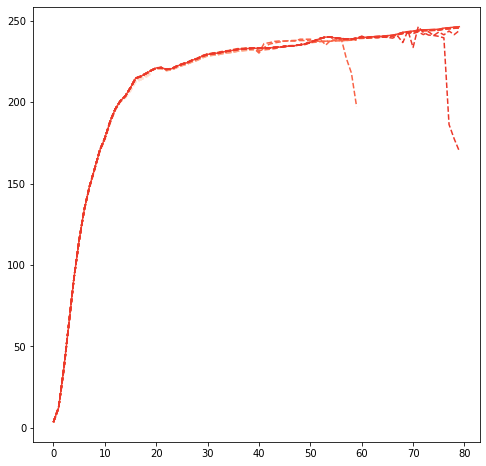

In [15]:
from matplotlib import cm
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['BleiLaffertyScore']
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

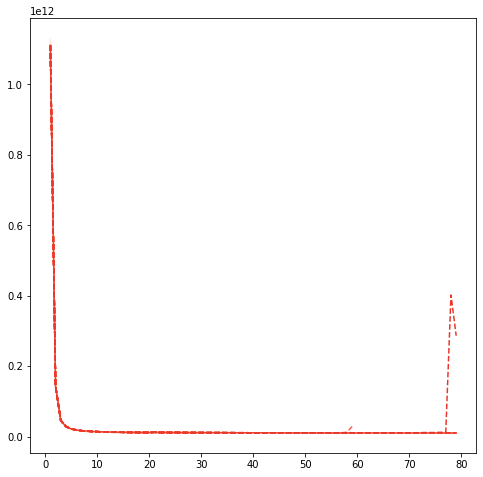

In [16]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['PerplexityScore@all']
    score[0] = float("nan")
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

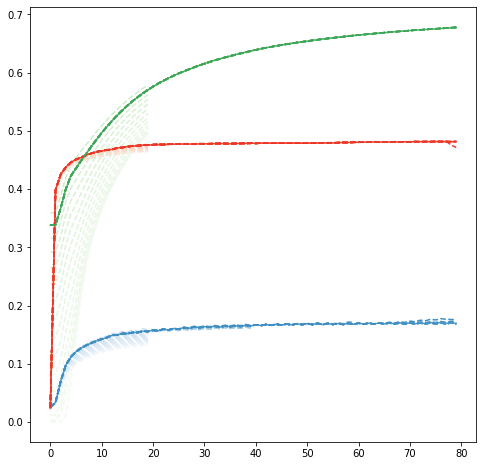

In [17]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@word.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@word.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    
    score = tm.scores['SparsityPhiScore@word']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

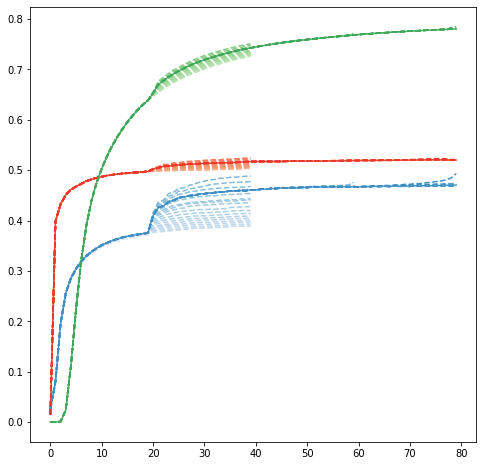

In [18]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@2gramm.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@2gramm.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    
    score = tm.scores['SparsityPhiScore@2gramm']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

## Investigate model

In [19]:
from topicnet.viewers.top_tokens_viewer import TopTokensViewer
from topicnet.viewers.top_documents_viewer import TopDocumentsViewer

In [20]:
first_model_top_tok = TopTokensViewer(best_model, num_top_tokens=10, method='phi')
first_model_html =  first_model_top_tok.to_html(first_model_top_tok.view())
first_model_top_doc = TopDocumentsViewer(best_model, dataset=dataset).view()

In [21]:
from IPython.display import display_html, display
from topicnet.cooking_machine.dataset import get_modality_vw


n=None
for line, topic_docs in list(zip(first_model_html, first_model_top_doc))[:n]:
    display_html(line, raw=True)
    for doc_id in topic_docs:
        doc_vw = dataset.get_vw_document(doc_id).values[0][0]
        doc_title = get_modality_vw(doc_vw, "@title")
        doc_snippet = get_modality_vw(doc_vw, "@snippet")
        display_html(f"<b>{doc_title}</b><br />{doc_snippet}", raw=True)

,topic_0 @2gramm
нервный_клетка,0.0432
нервный_система,0.03552
человеческий_мозг,0.01737
орган_чувство,0.0166
работа_мозг,0.01143
область_мозг,0.01017
потенциал_действие,0.01
кратковременный_память,0.00989
структура_мозг,0.00895
участок_мозг,0.0078


faqнейрогибридные системы 7 фактов об изучении нейронов в чашке петри

главы # собирание воспоминаний отрывок из книги «коннектом. как мозг делает нас тем, кто мы есть» профессора mit себастьяна сеунга

функции взрослых нейронов в мозге нейробиолог александр лазуткин о миграции нейронов, значении области гиппокампа и инфантильной амнезии

faqкомандные нейроны 5 фактов о различных функциях клеток в нервной системе

материальная основа памяти нейробиолог павел балабан о молекулах памяти, материальных следах воспоминаний и механизме процесса обучения

молекулярные механизмы памяти нейробиолог павел балабан о процессе обучения, «молекуле памяти» и высших функциях мозга

страхпричины, механизмы и рефлексы 5 фактов о физиологических основаниях и исследованиях страха

нейрокоммуникаторы, нейроконтроллеры, нейропротезы, экзоскелетоны психофизиолог александр каплан о возможностях мозга, нейроинтерфейсных технологиях и экспериментах с кибернетической рукой

клеточные следы сознания в мозге нейробиолог константин анохин об исследованиях субъективного опыта, эпизодической памяти у животных и активности клеток в момент запоминания

нейрогенетика памяти нейробиолог павел балабан о молекулах памяти, полногеномном анализе и нейродегенаративных заболеваниях

,topic_1 @2gramm
нобелевский_премия,0.0281
органический_химия,0.01492
высокий_температура,0.01474
кристаллический_структура,0.0136
высокий_давление,0.01154
химический_связь,0.00862
химический_реакция,0.00776
атом_углерод,0.00756
новое_материал,0.0074
ядро_земля,0.007


методы предсказания кристаллических структур химик артем оганов о задачах кристаллографии, методе uspex и структуре алмаза

новая химия под высоким давлением химик артем оганов об изменении химических связей элементов, эксперименте с давлением натрия и источнике нагрева ядра земли

гидродинамическая спиральность физик кит моффат о вихревой динамике, спиральном эффекте и магнитном поле земли

дизайн сверхтвердых материалов химик артем оганов о структуре алмаза, применении сверхтвердых материалов и новых формах углерода

«создать материал тверже алмаза принципиально невозможно» интервью с химиком артемом огановым о компьютерном дизайне новых материалов, искусственном интеллекте и самом твердом в мире материале

обнаружен полимерный раствор, затвердевающий при нагревании о взаимодействии различных фракций, образовании кристаллов и применении веществ с контролируемо изменяющимися свойствами

премии # нобелевская премия мира - 2013 спецпроект постнауки, посвященный нобелевской неделе и её результатам

запрещенные химические соединения химик артем оганов о составе вещества на поверхности, возникновении новой химии и химических реакциях в экстремальных условиях

реакция интеркалирования химик виктор авдеев о графитовой матрице, сверхсжатом состоянии металлов и интеркалировании природного вермикулита

обнаружено новое сверхпроводящее состояние о спинах электронов, магнитном поле и механизмах разрушения сверхпроводимости

,topic_2 @2gramm
греческий_миф,0.00918
греческий_мифология,0.00812
vi_век,0.0066
письменный_источник,0.00654
снорри_стурлусон,0.00612
культурный_традиция,0.00561
центральный_мексика,0.00556
чёрный_мор,0.0053
эпоха_викинг,0.00498
viii_век,0.00495


ацтекская империя историк дмитрий беляев о тройственном союзе ацтеков, формировании империи в теночтитлане и военно-религиозной идеологии

5 книг по истории доколумбовой америки что читать об индейских культурах нового cвета, рекомендует кандидат исторических наук дмитрий беляев

государства сапотеков и миштеков историк дмитрий беляев о культе предков, стенах черепов и археологических исследованиях в долине оахаки

первая империя мезоамерики историк дмитрий беляев об организации пространства теотиуакана, городском быте и особенностях культурной экспансии

автограф # «мода и люди. новая теория моды и модного поведения» беседа с социологом моды александром гофманом о его книге, посвященной этому сложному феномену

faqпарадокс конкисты 7 фактов о главных задачах и особенностях испанского завоевания америки

миф и архитектура филолог гасан гусейнов о мифологическом измерении архитектуры, ахиллесовой пяте и изоморфизме строений и человеческого тела

государства майя постклассического периода историк дмитрий беляев о коллапсе классической культуры майя, идеологической реформе в чичен-ице и теории тольтекского завоевания юкатана

история древней мезоамерики 10 лекций историка дмитрия беляева о становлении мезоамериканской цивилизации, ее культуре и политической жизни

faqэрос в античной культуре 7 фактов об одном из самых загадочных персонажей греческой мифологии

,topic_3 @2gramm
римский_право,0.02953
французский_революция,0.02211
право_собственность,0.016
веймарский_республика,0.01174
правовой_система,0.00888
римский_юрист,0.00731
третье_сословие,0.00686
вещный_право,0.00618
древний_рим,0.00541
гражданский_право,0.00529


левый терроризм в германии историк илья женин о студенческих протестах 1968 года, «фракции красной армии» и трагических событиях «немецкой осени»

начало французской революции историк дмитрий бовыкин о движении санкюлотов, конституции 1791 года и псевдонаучных открытиях жан-поля марата

5 книг по истории германии в хх веке что читать об историческом развитии германии от веймарской республики до современности, рекомендует кандидат исторических наук илья женин

веймарская республика историк илья женин о республике без республиканцев, октябрьской революции и социал-демократической партии

неисполнение и ответственность юрист дмитрий дождев об обязательствах должника, невозможности исполнения и положительном нарушении договора

папство и россияистория дипломатических отношений как развивались отношения москвы и святого престола и с какими проблемами им приходилось сталкиваться?

римское право 12 лекций о правовой системе древнего рима, отобранных историком права александром мареем

правовые последствия смешения вещей юрист денис новак о смешении однородных вещей, праве собственности на такое имущество и кондикционном иске

канцлерская демократия историк илья женин о политике конрада аденауэра, образовании фрг и процессе евроинтеграции

кондикция владения юрист денис новак о защите при неправомерном лишении владения, виндикационном и кондикционном исках и ценности владения имуществом

,topic_4 @2gramm
индоевропейский_язык,0.01585
языковой_семья,0.01442
человеческий_язык,0.01382
устный_речь,0.01228
языковой_разнообразие,0.00918
изучение_язык,0.00845
исторический_языкознание,0.0082
коммуникативный_система,0.00736
индоевропейский_семья,0.00708
разный_язык,0.00683


машинный перевод на основе правил лингвист леонид иомдин о контроле смысла переведенного текста, интегральном описании языка и синтаксической неоднозначности

faqмультимодальная лингвистика 6 фактов о невербальной коммуникации, процессе понимания речи и будущем лингвистики

тело в русском языке и культуре лингвист григорий крейдлин о семиотической концептуализации тела, глубине членимости и свойствах телесных объектов

5 книг о сравнительно-историческом языкознании что читать о методах и различных теориях компаративной лингвистики, рекомендует кандидат филологических наук георгий старостин

как взаимодействуют язык бытовой и язык официальный? лингвист борис иомдин об активном словарном запасе, языковых изменениях и текстах официальных документов

faqсамоисправления говорящего в спонтанной речи 6 фактов о типах речевых ошибок, допускаемых в устной речи

языковая конвергенция лингвист владимир беликов о лингвистической компаративистике, ситуации двуязычия и смешанных языках

faqоткрытие новых языков 7 фактов о работе лингвистов, корпусе текстов и качественных информантах

главы # в поисках родины отрывок из книги «генетическая одиссея человека» антрополога и популяционного генетика спенсера уэллса

древние языки африки лингвист кирилл бабаев о койсанских языках, генетических данных и древних растениях

,topic_5 @2gramm
мировой_война,0.05195
советский_союз,0.04431
гражданский_война,0.0327
политический_философия,0.01831
российский_империя,0.01139
политика_память,0.01052
советский_власть,0.00825
красный_армия,0.0068
начало_война,0.00637
речь_посполить,0.00536


главыинтерпретации сталинградской битвы отрывок из книги «сталинградская битвасвидетельства участников и очевидцев», вышедшей под редакцией историка йохена хелльбека

культурная память о первой мировой историк борис колоницкий об источниках информации о первой мировой войне, политике памяти европейских стран и травме гражданской войны

главысталин на войне отрывок из книги «сталин. жизнь одного вождя» историка олега хлевнюка о роли сталина в поражениях и победах в великой отечественной войне

автограф«актуальное прошлое» политолог ольга малинова об интерпретациях исторических событий, концепции тысячелетней истории россии и важности дня победы для современной политики памяти

эпоха сталина 11 материалов историка олега хлевнюка о зарождении и гибели сталинской эпохи, проблемах ее интерпретации и значении для мировой истории

«первая мировая война потеряна, у нас нет ее в памяти» интервью с историком алексеем миллером о политике памяти, войне 1812 года и значении «георгиевской ленточки»

главы # дело «сибирских сепаратистов» отрывок из книги «сибирь в составе российской империи»

приход сталина к власти историк олег хлевнюк о системе коллективного руководства после смерти ленина, заявлении сталина об отставке и полном контроле над органами госбезопасности

патриотическая риторика в годы гражданской войны историк людмила новикова об антибольшевистском лагере, красной пропаганде и мифе об интервенции

практики построения личности в утопических сообществах как педагогические технологии влияли на жизнь советских детей и подростков

,topic_6 @2gramm
нитрид_бора,0.01766
пермский_период,0.01228
поведение_животное,0.01164
юрский_период,0.01101
ископаемое_растение,0.00548
южный_америка,0.0054
частное_сектор,0.00507
меловой_период,0.00451
психика_животное,0.00447
социальный_поведение,0.00437


особенности строения голосеменных класса войновскиевых о спорных вопросах в изучении одной из самых своеобразных групп голосеменных растений, произраставших на земле в конце палеозойской эры

пермский период палеоботаник сергей наугольных о возникновении пермской системы, эпохе высокого стояния континентов и пермо-триасовом вымирании видов

5 книг о палеоботанике пермского периода что читать об ископаемых растениях пермского периода, рекомендует доктор геолого-минералогических наук сергей наугольных

«многие юрские животные продолжили свое развитие и даже имеют потомков в наше время» палеонтолог чжунхэ чжоу о многообразии удивительных животных юрского периода

палеоботаника палеоботаник сергей наугольных об истории дисциплины, главных открытиях и ее связи с палеозоологией

прямая речьжанна резникова этолог, доктор биологических наук о поведении животных, их когнитивных способностях, этике и гражданской позиции ученых

5 книг об этологии что читать о различных аспектах поведения человека и животных, рекомендует доктор биологических наук дмитрий жуков

главы # если бога нет отрывок из книги «истоки моралив поисках человеческого у приматов» известного биолога франса де вааля

зависит ли коммуникация псовых от цвета их глаз? о социальном поведении собак и волков, их общении с помощью взгляда и охотничьих навыках

faqтеория речевых актов 5 фактов об аналитической теории речепорождения и понимании произведений художественной литературы

,topic_7 @2gramm
магнитный_поль,0.03014
магнитный_пол,0.02198
квантовый_компьютер,0.01641
длина_волна,0.0121
углеродный_нанотрубка,0.00891
квантовый_точка,0.00874
квантовый_технология,0.00838
квантовый_механика,0.00783
электромагнитный_волна,0.00714
квантовый_состояние,0.00677


faqядерный магнитный резонанс 5 фактов о природе магнитных полей, спектре ядерного магнитного резонанса и применении метода ямр в современной химии

технология охлаждения атомов физик владимир мележик о волновых свойствах частиц, лазерном охлаждении и системах пониженной размерности

что придет на смену кремниевой электронике? физик алексей орлов о проблеме тепловыделения, попытках найти альтернативы кремнию и клеточных автоматах на квантовых точках

эффект переноса спина в спинтронике физик константин звездин о технологических проблемах наноэлектроники, магнитном вихре и генераторе свч-излучения

плащ-невидимкакак создают материалы, которые «обманывают» свет? о наноантеннах, оптических свойствах новых материалов, «гарри поттере» и перспективах нанофотоники

однослойные углеродные нанотрубки альберт насибулин о синтезе углеродных нанотрубок, аэрозольном методе и прозрачной электронике

сверхмощные лазерные филаменты физик алексей желтиков о нелинейной оптике, явлении самофокусировки и лазерном зондировании атмосферы

«квантовая телепортация используется для передачи секретной информации, которую невозможно украсть» интервью с физиком юджином ползиком о современном понимании идеи телепортации, сериале «star trek» и принципах квантовой криптографии

faqфотонные кристаллы 6 фактов об искусственно созданных структурах, обладающих свойствами обычных кристаллов

квантовая криптография выдержит ли классическая криптография появление квантового компьютера, существует ли абсолютно безопасное шифрование и как работают квантовые хакеры

,topic_8 @2gramm
стволовой_клетка,0.03812
естественный_отбор,0.02669
половый_отбор,0.01296
эволюционный_биология,0.01121
homo_sapiens,0.01101
теория_эволюция,0.00705
ход_эволюция,0.0066
процесс_эволюция,0.00624
австралийский_абориген,0.00613
костный_мозг,0.00527


faqэмбриональные стволовые клетки 7 фактов об уникальном типе плюрипотентных клеток млекопитающих

биоинженерия стволовых клеток биоинженер али хадемхосейни об искусственной клеточной среде, образовании опухолей и инженерных подходах к исследованиям стволовых клеток

эпигенетика и клонирование биолог рудольф йениш об овце долли, терапевтическом клонировании у млекопитающих и перепрограммировании клеток

faqнеандертальцы алтая 7 фактов о происхождении неандертальского населения на алтае, денисовой пещере и современных археологических исследованиях

как пациенту пересадили сетчатку глаза из «искусственных» клеток? о получении индуцированных плюрипотентных стволовых клеток и их применении в медицине

главы # как получить новое, унаследовав старое? часть главы из книги светланы бурлак "происхождение языка"

press-лекция # как сделать из одной клетки другуюхроники трансформаций генетик мария шутова о выращивании органов, культивировании ранних эмбриональных клеток и о биомедицинском применении их искусственных аналогов

главыобезьяночеловек отрывок из книги «рассказ предка» биолога ричарда докинза об истоках эволюционного древа и общих предках всех живых организмов

faqвозникновение человека 7 фактов о человекообразных обезьянах и эволюции человека

возникновение человека антрополог станислав дробышевский о примитивных чертах строения человека, человеке умелом и расселении homo

,topic_9 @2gramm
элементарный_частица,0.04521
стандартный_модель,0.04015
бозон_хиггс,0.03039
хиггсовский_бозон,0.01385
сильный_взаимодействие,0.01264
электрический_заряд,0.01187
космический_луч,0.01127
слабый_взаимодействие,0.01112
высокий_энергия,0.0108
атомный_ядро,0.00852


симметрии в мире элементарных частиц физик дмитрий казаков о типах преобразований в физике частиц, лоренц-инвариантности и нарушениях симметрии

спонтанное нарушение симметрии физик дмитрий казаков о массах частиц, слабых взаимодействиях и теореме голдстоуна

faqтоп-кварк 7 фактов о наиболее массивной частице стандартной модели

линейный коллайдер физик михаил данилов о недостатках стандартной модели, изучении t-кварка и поиске новых измерений

faqcp-нарушение в кварках 7 фактов о смешивании поколений кварков, экспериментах на бак и асимметрии в мире элементарных частиц

адроны физик дмитрий казаков о мире мезонов и барионов, свойствах кварков и адронных резонансах

антиоксиданты и сердечно-сосудистые заболевания фармаколог олег медведев о компонентах антиоксидантной системы, формах коэнзима и новых свойствах водорода

стандартная модель физик михаил данилов об экспериментах на коллайдерах, массе фундаментальных частиц и суперсимметрии

элементарные частицы физик дмитрий казаков об истории открытия, свойствах и классификации элементарных частиц

детекторы для экспериментов на коллайдерах физик павел пахлов о взаимодействии элементарных частиц, устройстве детекторов и применении данной технологии в повседневной жизни

,topic_10 @2gramm
солнечный_система,0.05638
планетный_система,0.02148
космический_аппарат,0.01617
парниковый_эффект,0.01247
протопланетный_диск,0.00958
король_артур,0.00948
образование_планета,0.00772
астрономический_единица,0.00768
извержение_вулкан,0.00731
поверхность_планета,0.00708


формирование планет и протопланетные диски астрофизик сергей попов об образовании планетных систем, снеговой линии и облаке оорта

faqобразование планетных систем 7 фактов о формировании скоплений звезд и различных незвёздообразных астрономических объектов

внутреннее строение экзопланет астрофизик сергей попов о веществах планетарных недр, типах экзопланет и зависимости плотности от размера

сравнительная планетология астроном дмитрий титов о типах планет солнечной системы, динамике атмосфер и парниковом эффекте на марсе и венере

есть ли жизнь на других планетах? астроном владимир сурдин о возможном расселении людей на луне, искусственных городах и внеземных цивилизациях

будущее экзопланетных исследований астрофизик сергей попов о поиске жизни на экзопланетах, международных космических проектах и наземных телескопах нового поколения

сверхземли астрофизик сергей попов о многообразии планет солнечной системы, свойствах сверхземель и составе экзопланет

система юпитера астроном дмитрий титов об особенностях спутников юпитера, возможности появления на них жизни и космической экспедиции juice

плутонистория исследований карликовой планеты астроном дмитрий вибе об объектах пояса койпера, атмосфере плутона, карликовых планетах и миссии new horizons

точка зрения # перспективы космических программ мнения экспертов постнауки о том, какое направление в области космических программ считается сегодня наиболее важным

,topic_11 @2gramm
массовый_культура,0.0431
культовый_кино,0.01543
cinema_studies,0.01434
общество_потребление,0.01192
молодёжный_субкультура,0.00871
плохой_кино,0.00827
хороший_вкус,0.00704
популярный_культура,0.00692
гуманитарный_наука,0.00646
живой_мертвец,0.00632


штурмуя публичное пространствослова о гетеротопии плохого вкуса философ александр павлов о теории кэмпа сьюзен сонтаг, русской традиции кинокритики и утопии хорошего вкуса

гендерные исследования в cinema studies философ александр павлов о методах психоанализа в cinema studies, образе «последней девушки» и анализе кинематографа с позиций феминизма

главы # скрытые механизмы идеологии в "бойцовском клубе" отрывок из книги «постыдное удовольствиефилософские и социально-политические интерпретации массового кинематографа» философа александра павлова

cinema studies как дисциплина философ и культуролог александр павлов об исследованиях кинематографа на западе, главных теоретиках cinema studies и развитии этой дисциплины в россии

феномен happy end культуролог екатерина лапина-кратасюк о популярном кинематографе, фильмах жанра нуар и «кошмаре на улице вязов»

5 книг о культовом кинематографе что читать о культовом кино, рекомендует доцент философского факультета ниу вшэ александр павлов

faqвзаимодействие рекламы и литературы 7 фактов о коммуникациях высокой и массовой культур в современном мире

5 фильмов, раскрывающих образ ученого в популярной культуре кино, снятое по мотивам реальной жизни и исследований известных ученых, рекомендует культуролог александр павлов

5 книг по расоведению что читать о современных достижениях расоведения и происхождении человеческих рас, рекомендует кандидат биологических наук станислав дробышевский

«хоббит»конфликт интерпретаций каковы скрытые и явные смысловые доминанты «хоббита» дж.р.р. толкина, которые в xxi стали препятствием для вхождения повести в систему массовой культуры?

,topic_12 @2gramm
ближний_восток,0.01885
национальный_государство,0.01688
северный_кавказ,0.01638
христианский_восток,0.01573
саудовский_аравия,0.00894
арабский_весна,0.0073
vii_век,0.00725
арамейский_язык,0.00665
христианский_культура,0.00661
арабский_страна,0.00602


культура арабов-христиан до ислама историк алексей муравьёв об арабских племенах сирии и месопотамии, доисламском христианстве в южной аравии и трудностях изучения этих культур

главыновые войны и политика отрывок из книги «новые и старые войны» политолога мэри калдор о новом типе организованного насилия

политическая история христианского востока историк алексей муравьёв о локальных цивилизациях древнего востока, миссионерских проектах и христианстве в эпоху арабских завоеваний

культура арабов-христиан после vii века историк алексей муравьёв об арабо-христианской литературе, культурном взаимодействии и «винной поэзии»

главы # гражданство и национальность отрывок из книги «культурные различия и политические границы в эпоху глобальных миграций» политолога владимира малахова

функция счета и технический прогресс психолог александр тхостов о высших психических функциях, объеме памяти и утрате навыков устного счета

цивилизации христианского востока историк алексей муравьёв о цивилизационных кругах востока, влиянии религии на культурные традиции и механизмах передачи христианского наследия

культура христианского востока курс лекций историка алексея муравьева о языковом и культурном разнообразии цивилизации христианского востока

эфиопская христианская культура историк алексей муравьёв о христианизации эфиопии, языке геэз и главных задачах эфиопистики

главынациональные контексты отрывок из книги «интеграция мигрантовконцепции и практики» политолога владимира малахова об особенностях поведения государств по отношению к иммигрантам

,topic_13 @2gramm
чёрный_дыра,0.09924
нейтронный_звезда,0.05448
белый_карлик,0.01196
белых_карлик,0.01179
компактный_объект,0.00957
звёздный_скопление,0.00939
зона_обитаемость,0.00866
спиральный_галактика,0.00819
химический_состав,0.00762
млечный_путь,0.00734


черные дыры в центрах галактик астрофизик ольга сильченко об открытии сверхмассивной черной дыры в туманности андромеды, исследованиях джона корменди и темных гравитирующих телах

главы # как все начиналось отрывок из книги «двигатели гравитации. как черные дыры управляют галактиками, звездами и жизнью в космосе» директора астробиологической обсерватории при колумбийском университете в нью-йорке kалеба шарфа

как были открыты черные дыры промежуточной массы? о методах определения массы черной дыры и загадке ультрамощных рентгеновских источников

галактический «каннибализм» астроном алексей расторгуев об испарении звезд, измерении массы млечного пути и слиянии галактик

черные дыры физик эмиль ахмедов об изучении черных дыр, карле шварцшильде и гигантских черных дырах

обнаружена самая яркая нейтронная звезда о пределе эддингтона, ультраярких рентгеновских источниках и тесных двойных системах

ударные волны вблизи компактных объектов астрофизик валерий сулейманов о нейтронных звездах, гравитации на космических кораблях и ньютоновском пределе

рентгеновское небо в фокусе астрофизик михаил ревнивцев о рентгеновских телескопах, болометрах и проекте обсерватории «спектр-рентген-гамма»

faqшаровые скопления 7 фактов об огромных и древних звёздных городах

природа космических радиоисточников астрофизик анатолий засов о синхротронном излучении, черных дырах в ядрах далеких галактик и нейтральном газе

,topic_14 @2gramm
промышленный_революция,0.0167
центральный_банк,0.01521
экономический_рост,0.01407
соединить_штат,0.01049
государственный_долг,0.01013
развивающийся_страна,0.01006
центральный_банка,0.00997
мировой_экономика,0.00951
финансовый_рынок,0.00768
развитый_страна,0.00753


главы # распределенный капитализм отрывок из книги «третья промышленная революция» экономиста и эколога джереми рифкина

главы # инфляция и гиперинфляция глава из книги "развязка. конец долгового суперцикла и его последствия" финансистов джона молдина и джонатана теппера

главы # от пузыря к пузырю отрывок из книги «линии разломаскрытые трещины, все еще угрожающие мировой экономике» профессора чикагского университета рагурама раджана

экономические колебания экономист сергей афонцев о причинах роста и спада экономики, экономическом кризисе и несостоятельности теорий экономических циклов

главыработа и безработица отрывок из книги "как работает экономика" экономиста ха-джун чанга о роли работы и безработицы в глобальном мире

faqнеформальность на рынке труда 6 фактов об интенсификации миграции и проблеме сопоставления заработков между разными секторами труда

faqкурсы валют 7 фактов о причинах роста и падения валют на финансовом рынке

точка зрения # евромайдан мнения экспертов постнауки о проблеме евроинтеграции украины

великая депрессия историк юрий рогулёв об антикризисных мерах рузвельта, зарождении социального законодательства в сша и спаде американской экономики в 1930-х годах

эволюция центральных банков и денежно-кредитного регулирования экономист сергей дубинин об истории становления банковской системы в мире, кризисах хх века и перспективах экономики россии

,topic_15 @2gramm
психический_заболевание,0.01193
зеркальный_нейрон,0.00736
депрессивный_состояние,0.00672
психический_расстройство,0.00607
удар_ток,0.00501
негативный_эмоция,0.00481
пушкинский_эпоха,0.00454
кругосветный_путешествие,0.00433
страховой_компания,0.00431
психический_травма,0.00424


механизмы самоутверждения личности психолог наталья харламенкова о трех стратегиях самоутверждения, типах личности и умении говорить «нет»

faqпсихическая травма и картина мира 5 фактов о последствиях травматических событий

faqпосттравматический стресс в отношениях «мать — дочь» 5 фактов о поведении матерей, переживших стрессовое событие

экспериментальная генетика поведения биолог инга полетаева о модельных животных, искусственном отборе и селекционных экспериментах

главы # разграничение психоанализа и психотерапии отрывок статьи учёного в области исследований психоаналитического процесса хорста кэхеле из третьего выпуска сборника "международного журнала психоанализа"

5 книг о натуралистах что читать о путешествиях исследователей дикой природы, рекомендует кандидат биологических наук сергей майоров

принцип «намеренной небрежности» в дендизме филолог ольга вайнштейн о впечатлении спонтанности в облике денди, поведении джентльменов в обществе и приеме table talk

социологическая операционализация социолог виктор вахштайн о переводе концептов в операнты, смещении релевантности и теории рационального выбора

главы # клинический язык винникотта отрывок профессора психологии джаны абрам из четвертого «международного психоаналитического ежегодника» об инновациях в клинической психологии

посттравматический стресс в отношениях «мать — дочь» психолог наталья харламенкова о симптомах посттравматического стресса, спутанности социальных ролей и комплексе покинутости

,topic_16 @2gramm
реликтовый_излучение,0.02485
теория_струна,0.02427
гравитационный_волна,0.02371
тёмный_энергия,0.01983
ранний_вселенная,0.0188
расширение_вселенная,0.01474
скопление_галактика,0.01257
космологический_постоянный,0.01207
большой_взрыв,0.01107
закон_физика,0.01039


faqполяризация реликтового излучения 7 фактов о видах поляризации, эксперименте planck и доказательствах инфляционной стадии расширения вселенной

главысовременная космология отрывок из 3-го издания книги «астрономиявек xxi» под редакцией владимира сурдина о важнейших событиях и нерешенных проблемах астрономии

поляризация реликтового излучения физик дмитрий горбунов об эксперименте bicep2, стадии инфляции и развитии теории гравитации

реликтовые гравитационные волны в свете данных обсерватории planck о b-моде поляризации реликтового излучения, намагниченной пыли и экспериментах bicep2 и planck

реликтовое излучение астроном лайман пейдж о развитии теории горячего большого взрыва, дипольной компоненте и зондировании вселенной до самых ранних эпох

что изменит открытие первичных гравитационных волн? астрофизик сергей попов о теории инфляции, поиске первичных гравитационных волн и заявлении коллаборации bicep

почему вселенную называют плоской? астрофизик олег верходанов об искривлении пространства, сценариях расширения вселенной и данных космической миссии planck

faqвселенная до горячей стадии 5 фактов о теориях развития вселенной, инфляционной модели и гравитационных волнах

вселенная до горячей стадии физик валерий рубаков о реликтовом излучении, зарождении неоднородностей и гравитационных волнах

олег верходанов"самое точное знание о физике вселенной несет реликтовое излучение" интервью с астрофизиком о методах исследования вселенной, проблемах проведения измерений и стандартной космологической модели

,topic_17 @2gramm
принятие_решение,0.0664
теория_относительность,0.01686
теория_игра,0.01516
система_отсчёт,0.01245
поведенческий_экономика,0.0071
теория_гравитация,0.00653
уравнение_максвелл,0.00651
электромагнитный_волна,0.00624
закон_ньютон,0.00621
теория_эйнштейн,0.00601


общая теория относительности физик эмиль ахмедов о неинерциальных системах отсчета, ковариантности и физическом смысле искривления пространства

главыот механики ньютона до электродинамики максвелла отрывок из книги «гравитация» физика александра петрова о понимании места механики и электродинамики в общей физической картине мира на рубеже xix и xx веков

субботний интенсив «общая и специальная теория относительности» 2 апреля с 12:00 до 19:00 в академии постнауки

faqспециальная теория относительности 5 фактов об основах и следствиях теории, изменившей физическую науку

создание общей теории относительности физик игорь волобуев о релятивистской механике, принципе эквивалентности и орбите меркурия

парадокс близнецов физик эмиль ахмедов о преобразованиях лоренца, специальной теории относительности и парадоксе стержня и сарая

специальная теория относительности физик эмиль ахмедов о преобразованиях лоренца, теореме нётер и global positioning system

главыобщая теория относительности и «счастливейшая мысль моей жизни» отрывок из книги «космос эйнштейна» физика митио каку о том, как эйнштейн работал над новой теорией гравитации в годы первой мировой войны

главыбедность и ребенок до появления на свет отрывок из книги «бедность и развитие ребенка» о том, как социальное неблагополучие влияет на разные аспекты развития ребенка

понятие поведенческой экономики экономист ксения паниди об идее рациональности, влиянии эмоций на поведение и когнитивных причинах экономических решений

,topic_18 @2gramm
русский_язык,0.1163
английский_язык,0.01307
литературный_язык,0.01283
дискурсивный_слово,0.01185
германский_язык,0.00942
христианский_имя,0.00823
множественный_число,0.00817
древнерусский_язык,0.00807
русский_князь,0.00798
русский_говор,0.00671


научная классификация и естественный языкпроблема орехов лингвист борис иомдин о бытовом и словарном определении «орехов» и формировании нового класса слов

русский диалектный консонантизм лингвист игорь исаев о твердости/мягкости согласных, особенностях артикуляции в говорах и методах фонетического анализа речи

«глагольный вид является едва ли не самым сложным для изучения» интервью с лингвистом алексеем шмелевым о предмете изучения аспектологии, ошибках в употреблении глаголов и сложностях русской грамматики

двувидовые глаголы лингвист александр пиперски об особенностях глаголов совершенного и несовершенного вида, интеграции в русский язык заимствованных глаголов и видовых противоречиях в русских словарях

гласные русского языка лингвист игорь исаев об истории гласных в литературном языке, следах утраченных букв и особенностях говоров

«диалектные черты имеют глубокую историю, но до сих пор сохраняются носителями, живущими в деревнях» интервью с лингвистом игорем исаевым о диалектных особенностях северного наречия русского языка

«один из самых коротких рассказов в истории человечества — знаменитые слова юлия цезаря “пришел, увидел, победил”» интервью с лингвистом мирой бергельсон о лингвистическом анализе рассказа, его роли в коммуникации и языковой норме

faqударение на предлог 7 фактов о системе ударений и памяти языка в поэтической традиции

архитектура грамматики лингвист екатерина лютикова об уровневых моделях языка, значении синтаксиса и генеративной лингвистике

стелла цейтлин«ни одна детская речевая инновация не является случайной» интервью с лингвистом о процессе освоения языка детьми, онтолингвистике и современных исследованиях

,topic_19 @2gramm
средний_век,0.03344
xvii_век,0.02233
католический_церковь,0.01423
xii_век,0.01392
xvi_век,0.01309
xiii_век,0.01297
священный_писание,0.00871
фома_аквинский,0.00865
xv_век,0.00767
повесть_временной,0.00753


автограф«меч христов. карл i анжуйский и становление запада» историк ярослав шимов о «сицилийской вечерне», значении крестовых походов и мировоззрении средневековых людей

«ритуалы — это и есть власть» интервью с историком михаилом бойцовым об обряде средневековой коронации, практике помазания и статусе королевской власти в европе

политическая теология xiii–xiv веков историк александр марей о последователях фомы аквинского, типах монархической власти и соотношении духовного и мирского

мертвое тело правителя в средние века историк михаил бойцов о погребении средневековых государей, практиках сохранения их тел и концепции воскрешения

faqнемецкая классическая философия как понятие 6 фактов о собраниях текстов, отцах-основателях и ошибочном представлении о понятии

faqсредневековая иудео-христианская полемика 7 фактов о развитии диалога между христианством и иудаизмом и публичных диспутах средневековья

faqобразы инквизиции 5 фактов о вкладе инквизиторов в историческую науку, «черной легенде» и использовании «инквизиции» в современном оппозиционном дискурсе

«главная загадка варфоломеевской ночикто стоял за покушением на адмирала колиньи» интервью с историком павлом уваровым о религиозных войнах в европе и событиях, предшествовавших варфоломеевской ночи

политическая теология франсиско де витории историк александр марей о природе человека, двойственности королевской власти и восстании против тирана

телесность власти в средние века историк михаил бойцов о качествах тела правителя, знаках власти и трупном синоде

,topic_20 @2gramm
искусственный_интеллект,0.03365
нейронный_сеть,0.02628
социальный_сеть,0.0246
программный_обеспечение,0.01412
машинный_обучение,0.01148
компьютерный_наука,0.00954
анализ_дать,0.00875
операционный_система,0.00714
база_дать,0.00712
язык_программирование,0.00712


дэвид вернон«то, что мы называем искусственным интеллектом, им не является» специалист по искусственному интеллекту дэвид вернон об истории создания ии, компьютерном зрении и способности роботов к самообучению

создана нейронная сеть, работающая по принципу машины тьюринга об архитектуре фон неймана, машине тьюринга и проверке работоспособности

«компьютерные науки исследуют что-то идеальное, чего в реальном мире может физически не присутствовать» интервью с программистом станиславом протасовым об особенностях компьютерных наук, параллельном программировании и искусственном интеллекте

компиляторы для языков программирования программный архитектор евгений зуев о разработке компиляторов, языке с++ и семантическом зазоре

технология ухода от баз данных в программировании инженер антон чижов о преимуществах оперативной памяти, способах хранения данных и системе «апрентис»

как обучить нейросеть понимать смысл текста программы? о машинном обучении, отличии формальных языков от естественных и обучающих выборках

анализ социальных сетей в интернете специалист по современной технике медиакоммуникаций берни хоган o том, как собирались и анализировались электронные социальные сети и что могут дать их исследования

механизмы управления репутацией в социальных сетях специалист по компьютерным наукам джу йонг ли об анализе социальных сетей, институте репутации и феномене дружбы в facebook

математические методы прогнозирования объемов продаж математик константин воронцов о применении задач машинного обучения в бизнесе, композициях адаптивных моделей и усовершенствовании качества данных

лингвистические технологии в интернете специалист в области информационных технологий анатолий гершман о принципах работы поисковиков, системе индексирования сайтов и способах определения тональности текста

,topic_21 @2gramm
генный_инженерия,0.01233
углекислый_газа,0.01233
чистый_культура,0.01066
молекулярный_машина,0.01013
синтетический_биология,0.00947
органический_вещество,0.00936
летучий_мышь,0.00897
интерфейс_мозг,0.00876
биологический_система,0.00752
динамический_система,0.0075


гидротермы и метановые сипы микробиолог николай пименов о выбросах углеводородных газов, метанобразующих археях и анаэробном окислении метана в черном море

микроорганизмы в болотах микробиолог светлана дедыш о влиянии болотных экосистем на климат, запасах пресной воды и метаногенезе

нейрокоммуникаторы психофизиолог александр каплан об интерфейсе мозг-компьютер, прямом понимании намерений мозга и будущем коммуникации

поколения биотоплива микробиолог зоригто намсараев об эффективности биотоплива, влиянии технологий на военные конфликты и эпохе нефти

очистка приземного воздуха микробиолог алла ножевникова о загрязнении воздуха, окислении вредных газов и роли городских газонов

биотехнологии биолог евгений куликов о биотехнологическом инсулине, чернилах из соевого масла и получении биотоплива и биоспирта

faqнейрокоммуникаторы 7 фактов о новой модели коммуникации между человеком и средой

микробный «метановый фильтр» микробиолог светлана дедыш о функциях метанотрофов, составе атмосферы и глобальном потеплении

faqхемолитоавтотрофные бактерии 7 фактов об автотрофах, гетеротрофах и различиях между ними

биотехнология микроводорослей биолог дмитрий лось об антиоксидантах, использовании микроводорослей в косметической промышленности и биотопливе

,topic_22 @2gramm
городской_пространство,0.01263
когнитивный_психология,0.01246
решение_задача,0.01115
малое_город,0.01073
городской_жизнь,0.00617
крупный_город,0.00544
социальный_психология,0.00522
прошлое_опыт,0.0052
зрительный_система,0.00517
движение_глаз,0.0051


поиск букв в больших буквенных массивахпарадоксы «теста мюнстерберга» психолог мария фаликман о нисходящих процессах в обработке буквенной информации и внимании в зрительном поиске

метафоры и модели внимания в когнитивной психологии психолог мария фаликман об ограничениях внимания, модели фильтра и факторах распределения ресурсов внимания

faqмышление в психологическом исследовании 7 фактов о методах исследования способов, которыми мы решаем задачи и проблемы

явление и понятие инсайта психолог владимир спиридонов об этапах решения задачи, ошибках переживания и психологических экспериментах

виды мышления психолог мария фаликман об особом подходе к исследованию мышления в психологии, различиях между теоретическим и практическим мышлением и имеющихся классификациях

классические исследования организации памяти психолог мария фаликман об экспериментах эббингауза и бартлетта, ассоциативных закономерностях памяти и ее схематичной организации

методы изучения категорий у детей психолог алексей котов о способности к категоризации, ее изучении и зрительных предпочтениях детей

психология создания трудностей и проблем психолог александр поддьяков о различных типах трудностей, их нравственной оценке и разработке игр

как развить творческие способности? психолог владимир спиридонов о психологии творчества, поиске креативных решений и эвристических стратегиях

можно ли измерить интеллект человека с помощью тестов на iq? что такое интеллект и как разрабатывают тесты на решение задач различного типа

,topic_23 @2gramm
социология_право,0.03662
скрытый_масса,0.01998
интеллектуальный_собственность,0.01357
советский_этнография,0.0112
коренной_народ,0.01003
теория_этнос,0.00956
рабочий_группа,0.00837
национальный_вопрос,0.00802
правовой_культура,0.00623
планета_двигаться,0.0059


стрелецкие бунты историк александр лаврентьев о бунте 1682 года, царевне софье и утре стрелецкой казни

что такое «по закону»история поиска ответов как сформировалась социология права, какие направления исследований доминируют сегодня и на какие работы по теме стоит обратить внимание, рассказывает социолог кирилл титаев

обнаружены ли следы распада темной материи? об особенностях рентгеновского излучения галактик и их скоплений

социология права 8 лекций социолога кирилла титаева об исследованиях правовых институтов и принципах функционирования законов

«итальянские корни» советской теории этноса как проходило становление российской этнологии и развитие дискуссий о народе, этносе и этничности в советский период

рабочие группы в суде социолог кирилл титаев о системе правосудия в сша, сделках о признании вины и российской специфике рабочих групп в суде

главы # гости с темной стороны глава из книги «достучаться до небеснаучный взгляд на устройство вселенной» физика-теоретика лизы рэндалл о темной материи

социология права социолог кирилл титаев о правоприменении, технологии соблюдения законов и повседневных практиках работы прокуратуры

5 книг по социологии права что читать о функционировании правовых норм и их изучении, рекомендует ведущий научный сотрудник института проблем правоприменения кирилл титаев

faqкоренные народы 7 фактов о том, как определяются национальные меньшинства в российском праве

,topic_24 @2gramm
система_образование,0.01342
гуманитарный_наука,0.01006
новый_программа,0.00776
научный_сообщество,0.00651
школьный_образование,0.00582
научный_работа,0.00538
прямая_речь,0.00523
исторический_знание,0.00517
заниматься_наука,0.00498
учёный_степень,0.00452


точка зрения # система грантов мнения экспертов постнауки, насколько ученый зависит от грантов

точка зрения # зачем нужен «список вак» и когда его отменят? мнения экспертов постнауки о публикациях в «ваковских журналах» и получении научной степени

подготовка успешной заявки на грант рекомендации ученым по процессу получения грантов у российских научных фондов

точка зрения # проблема преподавания химии в школе мнения экспертов постнауки об основных проблемах преподавания химии в средней школе

точка зрения # эффективность «диссернета» авторы постнауки оценили плюсы и минусы деятельности «диссернета»

точка зрения # история религии в школе мнения экспертов постнауки о том, нужно ли и как преподавать религиоведение в школе

проблема преподавания обществознания в школе философ елена брызгалина о междисциплинарности обществознания, проблемах современного образования и унификации преподавания

проблемы преподавания литературы в школе мнения экспертов постнауки об основных проблемах преподавания литературы в средней школе

перспективыбыть социологом социолог виктор вахштайн рассказывает, откуда берутся социологи, чему и как их учат и зачем они нам нужны

точка зрения # нужны ли экзамены в высшем образовании мнения экспертов постнауки об эффективности традиционной формы проверки знаний

,topic_25 @2gramm
простой_число,0.01085
конец_xix,0.00979
русский_формализм,0.00944
социальный_идентичность,0.00666
культурный_ландшафт,0.00563
рак_грудь,0.00534
екатерина_ii,0.00506
японский_культура,0.00439
центральный_европа,0.00424
политический_партия,0.00398


главы # «рождение досуга»возникновение и эволюция понятия в xix веке статья историка светланы малышевой о рождении культуры досуга из сборника «изобретение века. проблемы и модели времени в россии и европе xix столетия»

главы # закономерности простых чисел. гипотеза римана отрывок из книги «величайшие математические задачи» английского математика и популяризатора науки иэна стюарта

особенности либерализма в россии историк кирилл соловьев о первых русских либералах, поддержке самодержавия и политической программе кадетов

автограф«“черные кабинеты”история российской перлюстрации. xviii — начало xx века» историк владлен измозик о практике перлюстрации, механизмах вскрытия корреспонденции и неизбежности революции 1917 года

faqизменение ледников в арктике 6 фактов о таянии ледников, их расположении и климатическом потеплении

женская телесность и мода историк моды ольга вайнштейн об изобретении кринолина, отношении к женскому телу в xix веке и двойных стандартах нравственности

faqураган «сэнди» 7 фактов о тропическом циклоне, который ударил по восточному побережью сша

выборы президента сша как проходят президентские выборы в соединенных штатах америки, что такое праймериз и кокусы и как работает принцип «победитель получает все»

«традиционная японская культура уделяет огромное внимание одежде как социальному маркеру» интервью с японистом александром мещеряковым о статусе сумо, прививании европейских ценностей и антияпонском мифе

faqпонятие центральной европы 7 фактов о том, как складывались географические понятия в рамках европейской зоны

,topic_26 @2gramm
социальный_жизнь,0.01276
язык_описание,0.01237
социологический_теория,0.01048
иной_слово,0.00905
средний_класс,0.00723
социальный_отношение,0.00697
материальный_объект,0.00697
социальный_антропология,0.00686
социальный_взаимодействие,0.00667
социологический_исследование,0.00629


главынаучные практики отрывок из книги «после методабеспорядок и социальная наука» социолога джона ло о необходимости переизобретения методов и политики социальных наук

лгут ли опросы общественного мнения в россии? о причинах недоверия к результатам массовых опросов и типичных ошибках опросных организаций

faqсоциальная топология 7 фактов о понимании материального объекта и пространства в социологической теории

5 книг по основам микросоциологии классические работы, сформировавшие микросоциологию как дисциплину, рекомендует социолог михаил соколов

к социологической «теории относительности» события шредингерапример блефа в игре в покер

опросы общественного мнения — между наукой и политикой социолог григорий юдин о репрезентативности, инструментах политических технологий и роли опросов в демократическом обществе

порядок интеракции социолог михаил соколов о роли повседневной жизни, системе взаимодействий «лицом к лицу» и функционировании больших социальных систем

инциденты на дисциплинарных границах каковы «языковые» и «жанровые» отличия социологии от социальной антропологии?

формула сообщества почему понятие сообщества утрачивает значение?

социологическая интерпретация социолог виктор вахштайн о модели интерпретации в «играх разума», стадиях построения сюжета и требовании концептуальной сообразности

,topic_27 @2gramm
иммунный_система,0.02408
раковый_клетка,0.0176
метод_лечение,0.01126
опухолевый_клетка,0.00951
продолжительность_жизнь,0.00927
сахарный_диабет,0.00881
онкологический_заболевание,0.00857
сигнальный_путь,0.00822
иммунный_ответ,0.00788
лекарственный_препарат,0.00739


трансгенные животные и продление жизни биолог алексей москалев о генетике старения, регуляции метаболизма и геропротекторах

методы лечения рака биофизик петр федичев об обмане иммунной системы, формах рака и орфанных препаратах

хирургическое лечение сахарного диабета ii типа хирург юрий яшков о связи между сахарным диабетом и ожирением, эффективности бариатрических операций и опасности пищевых стереотипов

этические проблемы генетического тестирования генетик вера ижевская о взаимоотношениях врача и пациента, принципах биоэтики и конфиденциальности генетической информации

faqметоды лечения рака 6 фактов о мутации клеток, таргетных препаратах и подходах к лечению онкологических заболеваний

физиология микроводорослей биолог дмитрий лось о видовом разнообразии, очистке воздуха для космических полетов и полиненасыщенных жирных кислотах

главы # жиры и внимание к онкологическим заболеваниям отрывок из книг "китайское исследование" профессора биохимии колина кэмпбелла

механизм противоопухолевого действия белка яда осы об исследовании белка mp1, который выборочно замедляет пролиферацию клеток рака, и перспективах лечения болезни

криохирургия хирург алексей чжао о хирургических методах лечения с использованием заморозки, открытой криохирургии и системе «кибернож»

коронарный синдром профессор медицины александр васильев о симптомах коронарной болезни, синдроме x и стенокардии покоя

,topic_28 @2gramm
критический_теория,0.01824
научный_революция,0.01434
история_наука,0.01197
публичный_пространство,0.01022
современный_общество,0.00724
русский_авангард,0.00624
русский_философия,0.00605
историк_наука,0.00598
аналитический_философия,0.00544
интеллектуальный_история,0.00532


философские чувства как рождаются философские чувства, и почему лиризм как род философии нельзя отождествлять ни с одним ее направлением?

философия культуры лосева философ александр доброхотов о неоплатонической диалектике лосева, критике шпенглера и методологии исследования культуры

понятие идеологии социолог культуры арсений хитров о придворном философе наполеона i, критике капитализма у маркса и конструкте «человеческая природа»

гегель сегодня философ иван болдырев об исследователях гегелевской философии, аналитической теории действия и консерватизме

критическая теория социолог арсений хитров об истоках критической теории, условиях познания и политическом активизме

главымеханицизм. декарт конструирует вселенную отрывок из книги «научная революция как событие» историков науки питера деара и стивена шейпина о появлении науки в ее современном понимании

русский космизм философ алексей козырев об идеале бессмертия, влиянии космизма на космонавтику и проблемах гелиофизики

что читать«картина мира эпохи авангарда» юрия гирина латиноамериканист андрей кофман рекомендуетсамая интересная книга о феномене авангарда как культурном явлении xx века

автограф # «правда и ложь в истории великих открытий» историк науки джон уоллер говорит о том, как среда влияет на научную деятельность и какую память оставляет о себе учёный

философия культуры аверинцева философ александр доброхотов о наследии аверинцева, филологии как службе понимания и принципах исследования культуры

,topic_29 @2gramm
живой_организм,0.02128
молекула_днк,0.01925
генетический_информация,0.01559
молекулярный_биология,0.01178
живой_клетка,0.00946
двойной_спираль,0.00882
последовательность_днк,0.00881
трансгенный_растение,0.00829
структура_днк,0.00803
кишечный_палочка,0.00797


репликация днк биофизик максим франк-каменецкий о принципе комплементарности, разделении нитей и роли теломеразы при синтезе днк

необычные формы днк биофизик максим франк-каменецкий о двойной спирали рнк, неканонических формах днк и условиях их образования

элементарная хроматиновая фибрилла биолог евгений шеваль о фиксации компонентов живой клетки, искусстве замораживания молекул и нуклеосомной фибрилле

процесс удвоения днк может регулироваться и на стадии элонгации об удвоении хромосом и механизмах регуляции этого процесса

зонд на основе днк измеряет силу между клеткой и поверхностью о флуоресцентных молекулах, взаимодействии клеточной мембраны с внешней средой и измерении силы в несколько пиконьютонов

повреждения днк биофизик максим франк-каменецкий о мутациях генома, королеве виктории и болезни тея — сакса

каноническая структура днк биофизик максим франк-каменецкий о двойной спирали днк, правиле комплементарности и расшифровке генома человека

faqнаука о клетке 7 фактов о самой элементарной системе организма

как днк с синтетическими нуклеотидами встроили в живую клетку? микробиолог константин северинов о центральной догме молекулярной биологии и увеличении информационной емкости днк

faqфлуоресцентные белки 7 фактов о возможностях использования свойства существ светиться в темноте

,bcg_30 @2gramm
речь_идти,0.01224
крайний_мера,0.0108
xx_век,0.01018
xix_век,0.01015
дать_случай,0.0096
огромный_количество,0.00744
большой_количество,0.00743
конец_конец,0.00492
данный_момент,0.00491
друг_друг,0.0049


читательский опыт культуролог ирина каспэ об антропологическом повороте, рецептивной эстетике и степени свободы читателя

трансформация детства философ и культуролог виталий куренной о концепции нейла постмана, отсутствии секретов и обществе знания

осип мандельштам литературовед олег лекманов о воспоминаниях надежды мандельштам, понятии «подтекст» и подмене статьи лидии гинзбург

разрушение кооперации биолог петр турчин о структурно-демографической теории, негативных фазах жизни общества и влиянии элиты

постсоветский этнический конфликт востоковед алексей малашенко об отмене советских запретов, неизбежности конфликта и выборе идентичности

что читать«писать поперек» абрама рейтблата гасан гусейнов рекомендуетсамая интересная книга о русской литературной истории

транснациональная история историк дина гусейнова о национальных интересах, «оборонсервисе» и наследии первой мировой войны

акмеизм литературовед олег лекманов о русской семантической поэтике, анне ахматовой и главном принципе акмеизма

литературный мир «хоббита» филолог мария штейнман о литературной игре, особенностях стиля толкина и трех уровнях «хоббита»

крылов и народность филолог екатерина лямина о биографии писателя, актуальности его наследия и влиянии на русскую культуру

In [22]:
best_model.class_ids

{'@2gramm': 8.780309757546435,
 '@word': 1.0,
 '@post_tag': 79.51461372081415,
 '@3gramm': 245.1655266757866}